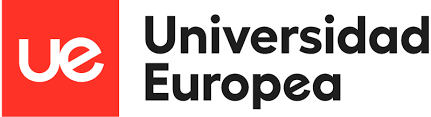
</div>

<h1 style="font-family: 'Product Sans Black', sans-serif; font-size: 27px;">INTELIGENCIA ARTIFICIAL</h1>

<h1 style="font-family: 'Product Sans Black', sans-serif; font-size: 27px;">PREDICCIÓN DE ACCIDENTES CEREBROVASCULARES</h1>

**Estudiante:** Junjie Wu

**Docente:** Carlos Ramírez Lizan

**Segundo semestre**

**Junio 2023**


<h1 style="font-family: 'Product Sans Black', sans-serif; font-size: 20px;">DESCRIPCIÓN</h1>


Utilizaremos técnicas de Machine Learning para predecir la probabilidad de tener un ictus (o accidente cerebrovascular). 

Contamos con un conjunto de datos que incluye información demográfica y médica de los individuos. 

Antes de aplicar el modelo de Machine Learning, realizaremos una limpieza y transformación de los datos para asegurar su adecuado procesamiento.

<h1 style="font-family: 'Product Sans Black', sans-serif; font-size: 20px;">INFORMACIÓN DE LOS ATRIBUTOS</h1>


1) **id:** identificador único

2) **gender:** (0)"Male", (1)"Female" u (2)"Other"

3) **age:** edad del paciente

4) **hypertension:** 0 = no tiene hipertensión, 1 = tiene hipertensión

5) **heart_disease:** 0 = no tiene ninguna enfermedad cardiovascular, 1 = tiene alguna enfermedad cardiovascular

6) **ever_married:** (0)"No" or (1)"Yes"

7) **work_type:** (0)"children", (1)"Govt_jov", (2)"Never_worked", (3)"Private" or (4)"Self-employed"

8) **Residence_type:** (0)"Rural" or (1)"Urban"

9) **avg_glucose_level:** media de niveles de glucosa en sangre

10) **bmi:** índice de masa corporal 

11) **smoking_status:** (0)"formerly smoked", (1)"never smoked", (2)"smokes" or (3)"Unknown"*

12) **stroke:** 1 = si tuvo ictus o un accidente cerebrovascular or 0 = si no lo tuvo

Nota: "Unknown" en smoking_status significa que la información no está disponible para ese paciente

*Referencia: https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset*


<a id="1"></a><h1 align="center" style="font-family: 'Product Sans Black', sans-serif; font-size: 27px; background-color: #ccdbfd; padding: 14px; box-shadow: 2px 2px 5px rgba(0, 0, 0, 0.2); color: #333333;">IMPORTAR DATASET</h1>


In [1]:
import pandas as pd
data = pd.read_csv('healthcare-dataset-stroke-data.csv')
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


<a id="1"></a><h1 align="center" style="font-family: 'Product Sans Black', sans-serif; font-size: 27px; background-color: #ccdbfd; padding: 14px; box-shadow: 2px 2px 5px rgba(0, 0, 0, 0.2); color: #333333;">LIMPIEZA DE DATOS</h1>


Tras visualizar la dataset, podemos observar que debemos realizar las siguientes limpiezas:
* Hacer un drop de los valores NaN
* Transformar los valores String a valores numéricos

In [2]:
stroke = data.copy()

In [3]:
stroke = stroke.drop(['id'], axis = 1)

In [4]:
stroke = stroke.dropna()

In [5]:
#Value counts de la variable target
stroke['stroke'].value_counts()

0    4700
1     209
Name: stroke, dtype: int64

Reemplazamos por valores numéricos. (P.e.: Cambiar Male por un valor de 0, Female por un valor de 1 y en caso de que otro sexto, cambiar por un valor de 2)

In [6]:
# Mapear los valores de texto a numéricos
stroke['gender'] = stroke['gender'].map({'Male': 0, 'Female': 1, 'Other': 2})
stroke['ever_married'] = stroke['ever_married'].map({'No': 0, 'Yes': 1})
stroke['work_type'] = stroke['work_type'].map({'children': 0, 'Govt_job': 1, 'Never_worked': 2, 'Private': 3, 'Self-employed': 4})
stroke['Residence_type'] = stroke['Residence_type'].map({'Rural': 0, 'Urban': 1})
stroke['smoking_status'] = stroke['smoking_status'].map({'formerly smoked': 0, 'never smoked': 1, 'smokes': 2, 'Unknown': 3})

In [7]:
stroke.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,67.0,0,1,1,3,1,228.69,36.6,0,1
2,0,80.0,0,1,1,3,0,105.92,32.5,1,1
3,1,49.0,0,0,1,3,1,171.23,34.4,2,1
4,1,79.0,1,0,1,4,0,174.12,24.0,1,1
5,0,81.0,0,0,1,3,1,186.21,29.0,0,1


In [8]:
# Confirmamos que no nos hemos dejado ninguna celda en nulo, ya que al hacer la sustitución, 
# cualquier error dará como resultado un reemplazo por un null. 
stroke.columns[stroke.isnull().any()]

Index([], dtype='object')

In [9]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
# X almacena todas las variables influyentes
X = stroke.drop('stroke',axis=1)
# y almacena la variable objetivo
y = stroke['stroke']
# Dividimos el conjunto en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20)
# Creamos el modelo
oversample = RandomOverSampler(sampling_strategy='minority')
X_over, y_over = oversample.fit_resample(X_train,y_train)
rf = RandomForestClassifier()
rf.fit(X_over,y_over)

RandomForestClassifier()

In [10]:
# Calculamos el accuracy del modelo
preds = rf.predict(X_test)
print(accuracy_score(y_test,preds))

0.9429735234215886


El archivo `fhs_rf_model.pkl`contendrá toda la información necesaria para **reconstruir el modelo entrenado** y permitirá cargarlo nuevamente en un programa Python utilizando la función joblib.load(). 

Esto es útil porque **evita tener que volver a entrenar el modelo desde cero** cada vez que se necesite utilizarlo, lo que puede ser un proceso costoso en términos de tiempo y recursos computacionales.

In [11]:
import joblib
joblib.dump(rf, 'fhs_rf_model.pkl')

['fhs_rf_model.pkl']